In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , MinMaxScaler, RobustScaler ,StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel

In [3]:

df = pd.read_csv(r'employee.csv')
df.head(2)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
# df['Performance_Score'] = df['Performance_Score'].astype('str')
df['Resigned'] = df['Resigned'].astype('str')

In [6]:
df.describe().loc[['mean','50%','min','max']]

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
mean,50000.5,41.02941,4.47607,2.99543,6403.211,44.95695,24.43117,14.51493,7.00855,50.0905,10.01356,49.50606,0.99972,2.999088
50%,50000.5,41.00000,4.00000,3.00000,6500.000,45.00000,24.00000,15.00000,7.00000,50.0000,10.00000,49.00000,1.00000,3.000000
min,1.0,22.00000,0.00000,1.00000,3850.000,30.00000,0.00000,0.00000,0.00000,0.0000,1.00000,0.00000,0.00000,1.000000
max,100000.0,60.00000,10.00000,5.00000,9000.000,60.00000,49.00000,29.00000,14.00000,100.0000,19.00000,99.00000,2.00000,5.000000


In [7]:
df[['Department','Gender','Job_Title','Education_Level','Performance_Score']].describe()

,Performance_Score
count,100000.000000
mean,2.995430
std,1.414726
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [8]:
df.columns
cat = []
num = []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

del num[0] # employee id
del cat[3] # hire date

In [9]:
def cols():
    print('cat -> ',cat,'\n')
    print('num -> ',num)
cols()

cat ->  ['Department', 'Gender', 'Job_Title', 'Education_Level', 'Resigned'] 

num ->  ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score']


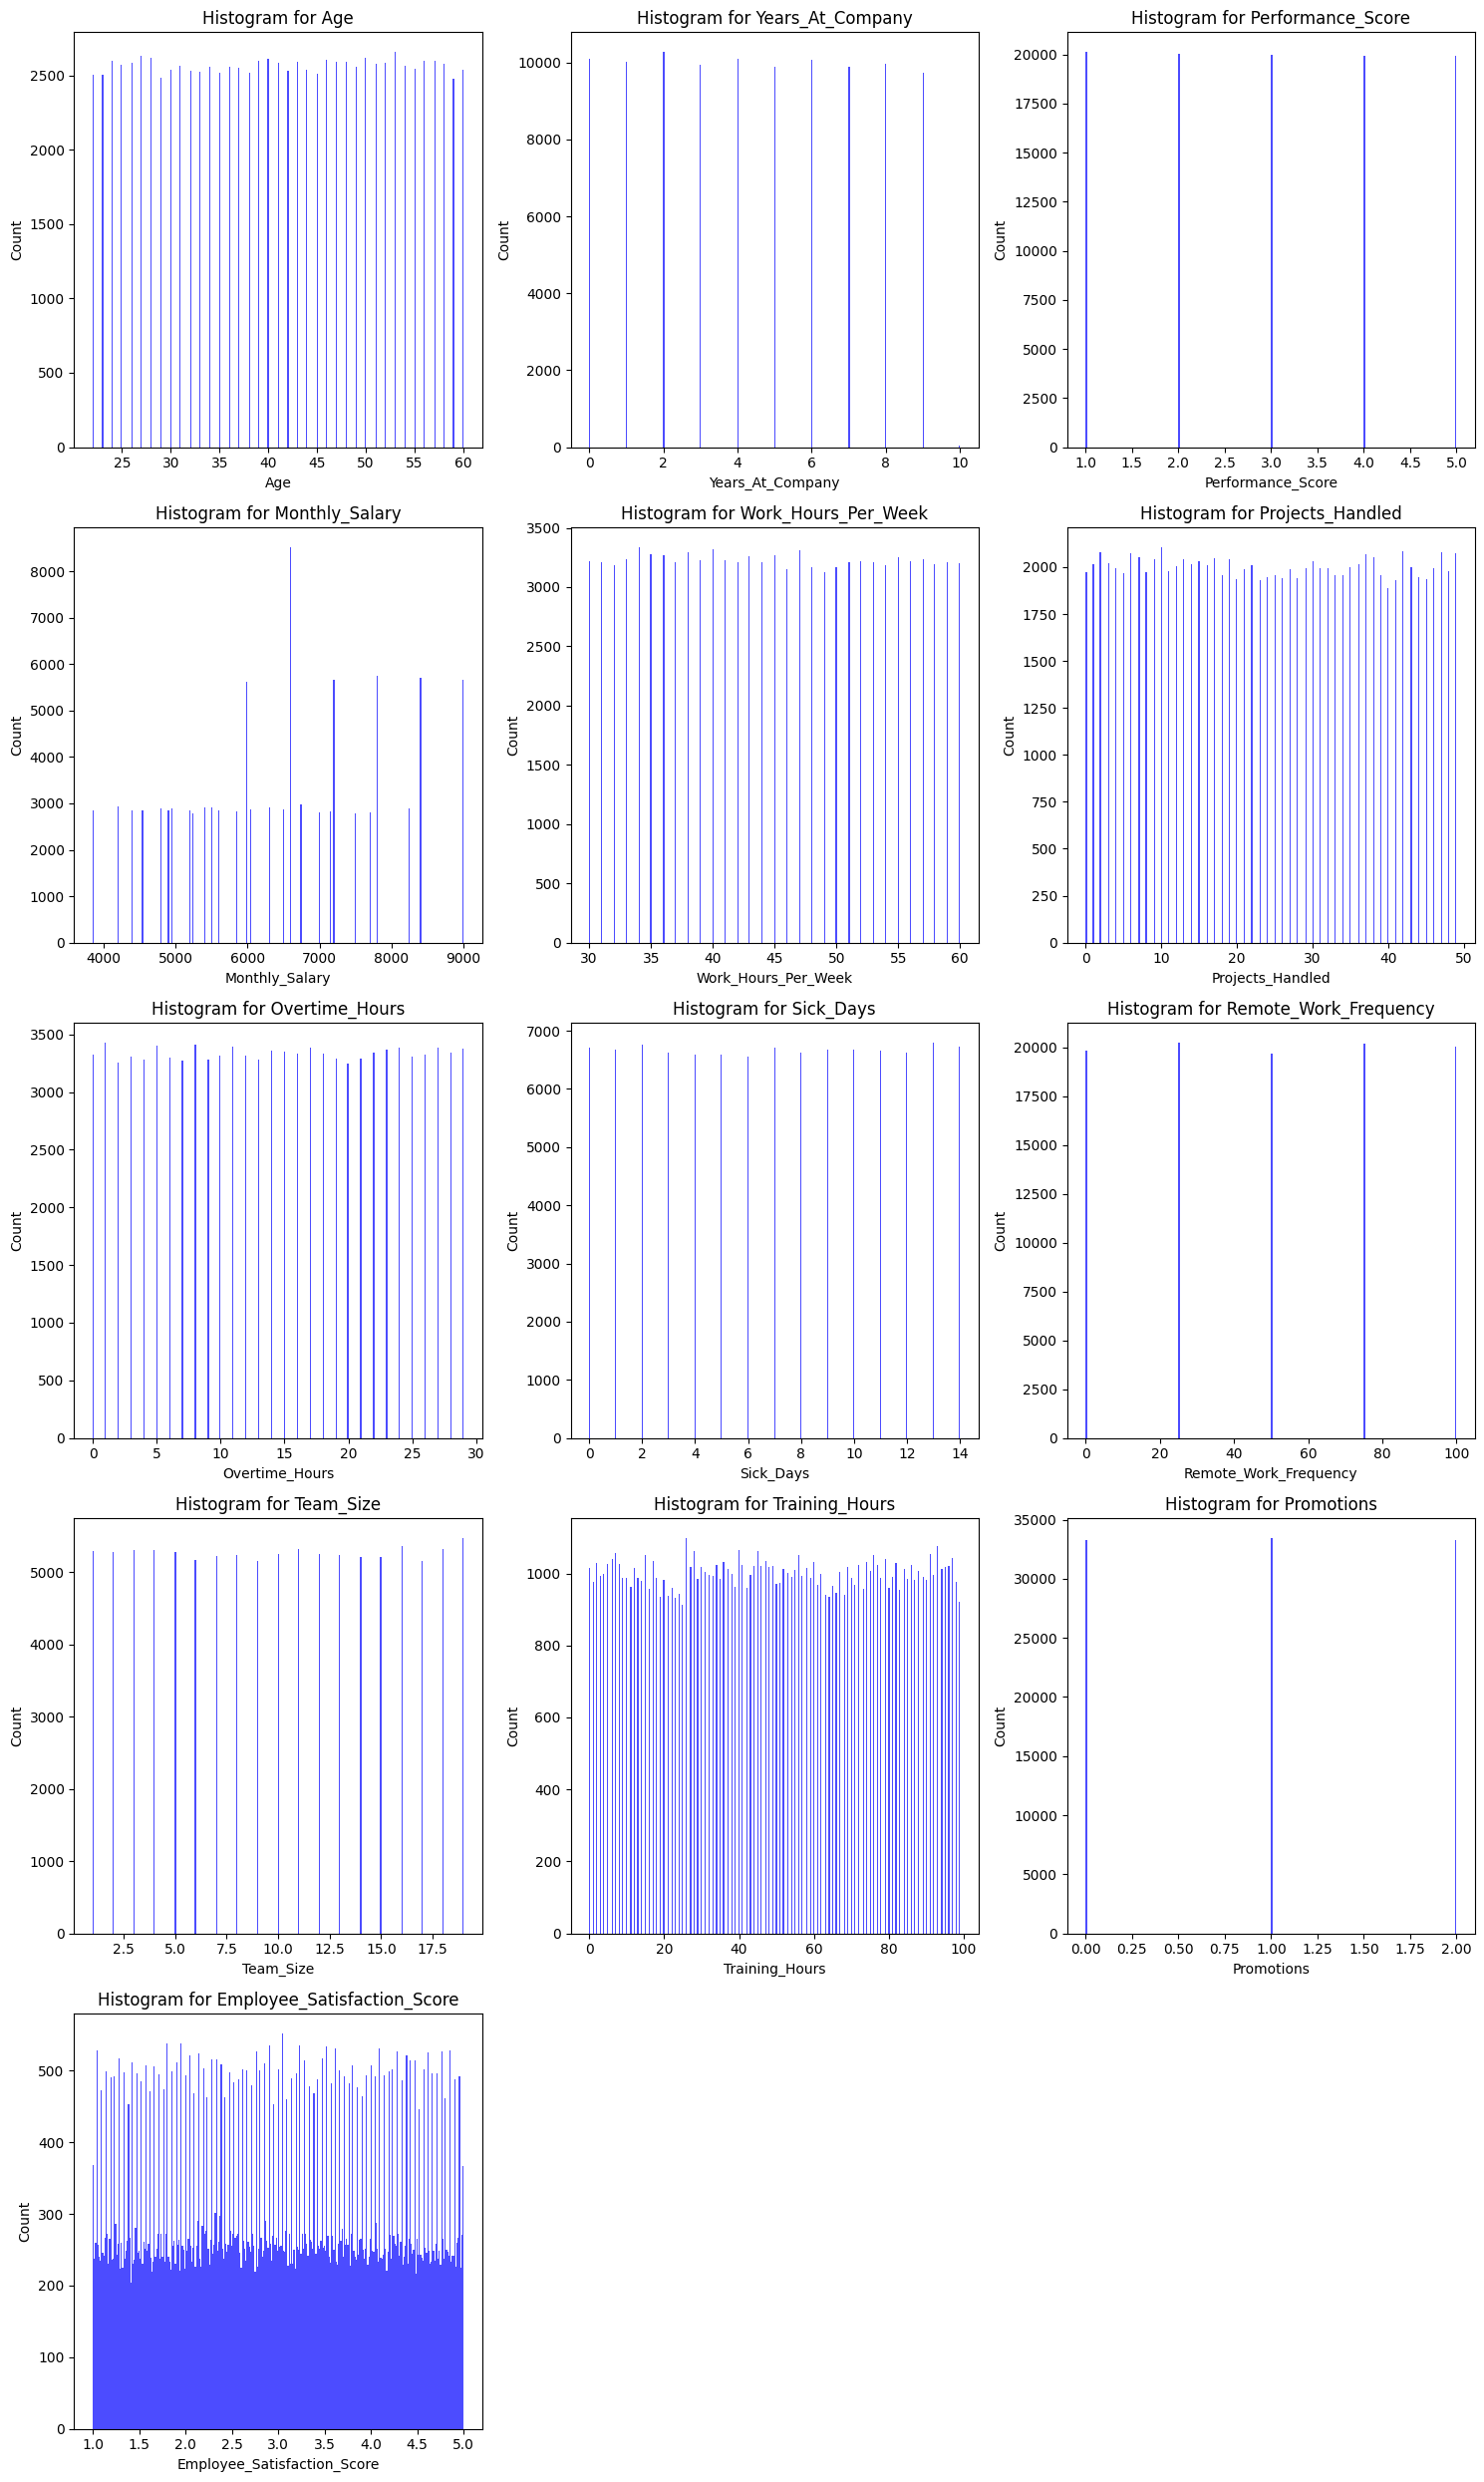

In [10]:
# SEE THE DISTRIBUTION OF NUMERICAL DATA

# 1. HISTOGRAMS
# 2. BOX PLOTS


# Calculate the number of rows required
n_cols = 3  # Number of histograms per row
n_rows = -(-len(num) // n_cols)  # Ceiling division to calculate rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easier iteration (handles single row/column edge cases)
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(num):
    axes[i].hist(df[column], bins=int(np.sqrt(len(df))), color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any extra subplots if num isn't a multiple of 3
for j in range(len(num), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


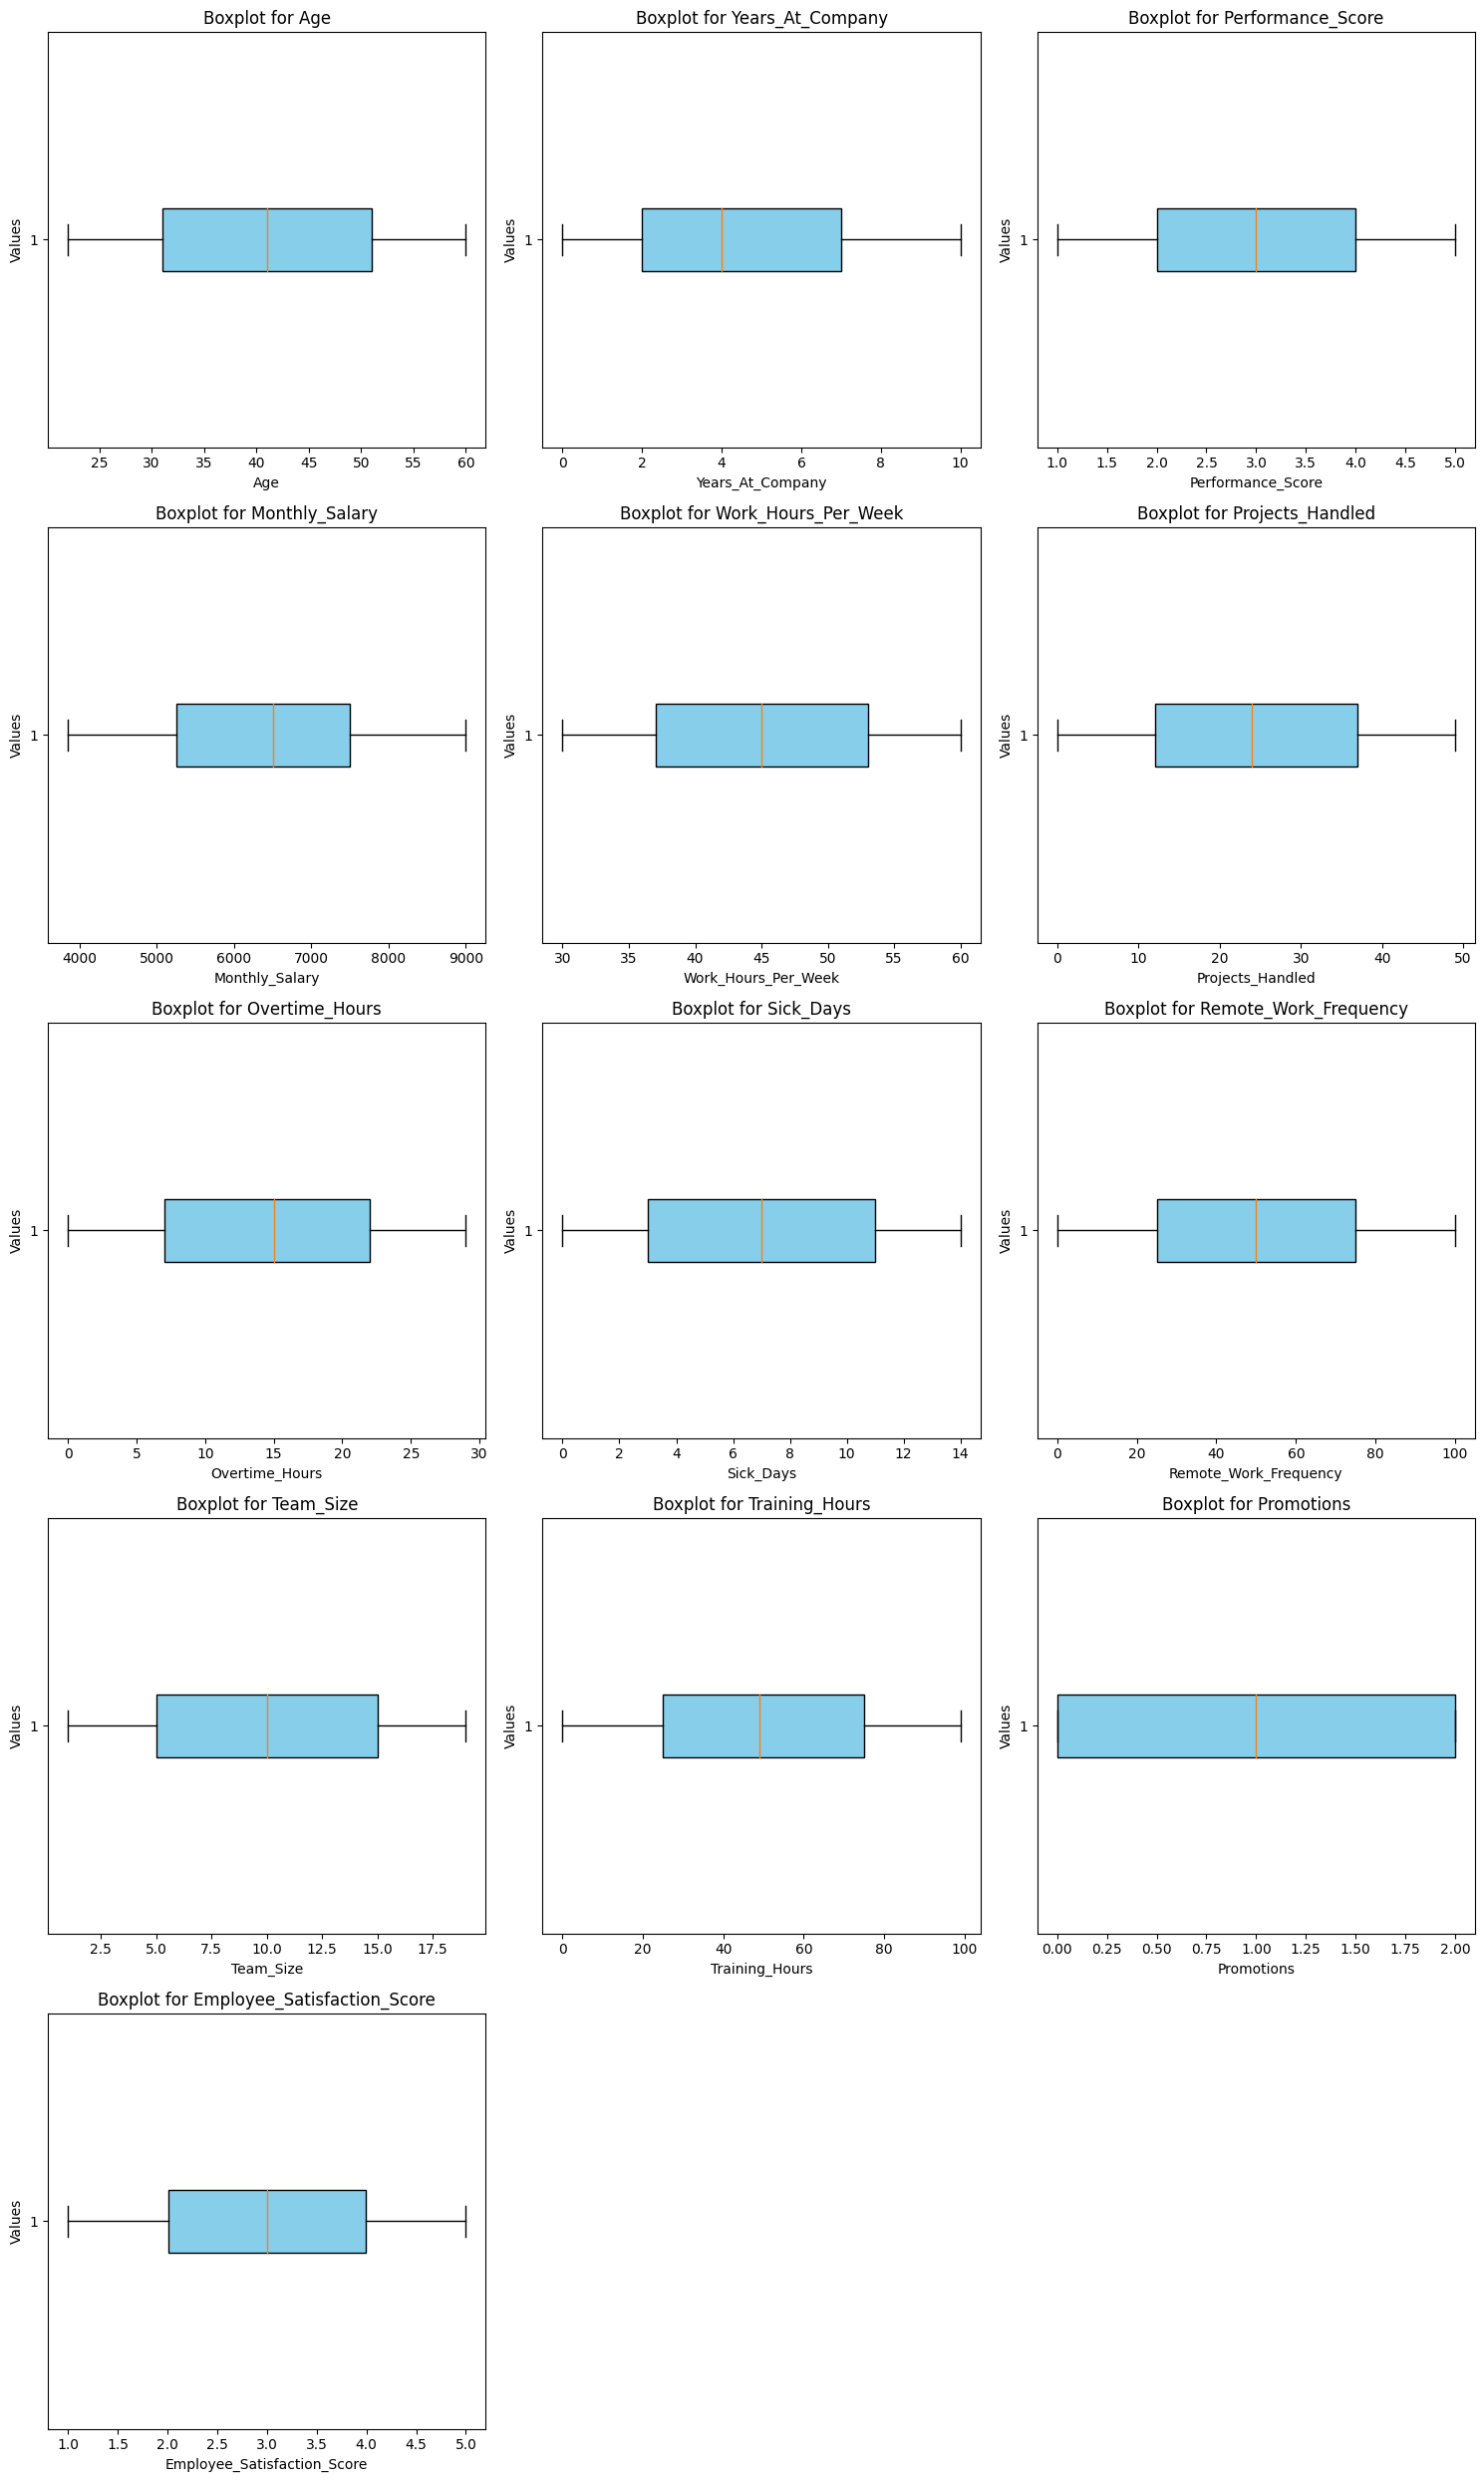

In [11]:
import matplotlib.pyplot as plt

# Calculate rows and columns for subplots
n_cols = 3  # Number of plots per row
n_rows = -(-len(num) // n_cols)  # Ceiling division for number of rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for iteration
axes = axes.flatten()

# Plot boxplots
for i, column in enumerate(num):
    axes[i].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

# Hide any unused subplots
for j in range(len(num), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [12]:
# NO OUTLIERS AND NON SKEWED DATA


In [13]:
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [14]:
target= df[['Performance_Score']]
target #Classification

,Performance_Score
0,5
1,5
2,3
3,2
4,2
...,...
99995,4
99996,5
99997,2
99998,5


In [15]:
df.columns
df1 = df[['Department', 'Gender', 'Age', 'Job_Title',
       'Years_At_Company', 'Education_Level',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned','Performance_Score']].copy()

In [16]:
df1

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Performance_Score
0,IT,Male,55,Specialist,2,High School,6750.0,33,32,22,2,0,14,66,0,2.63,False,5
1,Finance,Male,29,Developer,0,High School,7500.0,34,34,13,14,100,12,61,2,1.72,False,5
2,Finance,Male,55,Specialist,8,High School,5850.0,37,27,6,3,50,10,1,0,3.17,False,3
3,Customer Support,Female,48,Analyst,7,Bachelor,4800.0,52,10,28,12,100,10,0,1,1.86,False,2
4,Engineering,Female,36,Analyst,3,Bachelor,4800.0,38,11,29,13,100,15,9,1,1.25,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Finance,Male,27,Technician,1,Bachelor,4900.0,55,46,5,3,75,16,48,2,1.28,False,4
99996,IT,Female,36,Consultant,6,Master,8250.0,39,35,7,0,0,10,77,1,3.48,True,5
99997,Operations,Male,53,Analyst,8,High School,4800.0,31,13,6,5,0,5,87,1,2.60,False,2
99998,HR,Female,22,Consultant,9,High School,8250.0,35,43,10,1,75,2,31,1,3.10,False,5


In [17]:
df1.columns

Index(['Department', 'Gender', 'Age', 'Job_Title', 'Years_At_Company',
       'Education_Level', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Resigned', 'Performance_Score'],
      dtype='object')

In [18]:
df2 = df1[['Department', 'Gender', 'Age', 'Job_Title', 'Years_At_Company',
       'Education_Level',  'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions','Monthly_Salary', 'Performance_Score']].copy()

In [19]:
input = df2[df2.columns[0:-1]]
target = df2[df2.columns[-1]].replace({1:0,2:1,3:2,4:3,5:4})
input
target

0        4
1        4
2        2
3        1
4        1
        ..
99995    3
99996    4
99997    1
99998    4
99999    0
Name: Performance_Score, Length: 100000, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split( input,target,train_size=0.2,random_state=45 )

In [21]:
x_train.shape

(20000, 15)

In [22]:
df[['Department','Gender','Job_Title','Education_Level']].describe()

,Department,Gender,Job_Title,Education_Level
count,100000,100000,100000,100000
unique,9,3,7,4
top,Marketing,Male,Specialist,Bachelor
freq,11216,48031,14507,50041


In [23]:
# OHE
# ORDINAL ENCODE
# SCALING
# FEATURE SELECTION
# 
trf1 = ColumnTransformer([
                        ('onehotencode',OneHotEncoder(drop='first'),['Department','Gender','Job_Title']),
                        ('ordinal encoder',OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']]),['Education_Level'])
                        ]
                          ,remainder='passthrough')

trf2 = ColumnTransformer([
                        ('scaling',MinMaxScaler(),slice(0,None)) # slice all columns
                        ]
                          ,remainder='passthrough')

# trf3 = ColumnTransformer([
#                         ('algo',LogisticRegression())
#                         ])


In [24]:
pipe1 = Pipeline([('categorical', trf1), ('scaling', trf2),('feature_selection','passthrough'),('algo',None)])

In [25]:
param_grid =[
    {
'scaling__scaling':[MinMaxScaler(),StandardScaler()],
# 'feature_selection': [SelectFromModel(estimator=RandomForestClassifier())],
# 'feature_selection__max_features' : [5,10,20],
'algo':[RandomForestClassifier()],
'algo__n_estimators': [100,300,500],
'algo__max_depth': [None,6],
'algo__max_features' : ['sqrt', 'log2']

},

# {
# 'scaling__scaling':[StandardScaler()],
# 'feature_selection': [SelectFromModel(estimator=RandomForestClassifier())],
# 'feature_selection__max_features' : [5,10,20],
# 'algo':[XGBClassifier()],
# 'algo__eta':[0.3,0.01],
# 'algo__n_estimators': [100,300,500],


# }
]

grid_search = GridSearchCV(pipe1,param_grid,scoring='accuracy',n_jobs=-1,return_train_score=True,cv=2,verbose=5)

In [26]:
fit_model = grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


In [27]:
# # Top features
# feature_selector1 = fit_model.best_estimator_.named_steps['categorical']
# f1 = feature_selector1.get_feature_names_out()
# feature_selector2 = fit_model.best_estimator_.named_steps['scaling']
# f2 = feature_selector2.get_feature_names_out()


# all_cols = pd.DataFrame({'names':f1,'coded':f2})

# selected_cols = fit_model.best_estimator_.named_steps['feature_selection'].get_feature_names_out()

In [28]:
# all_cols

In [29]:
# selected_cols # fearture selection

In [30]:
print("Best Estimator: ", grid_search.best_estimator_)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Estimator:  Pipeline(steps=[('categorical',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencode',
                                                  OneHotEncoder(drop='first'),
                                                  ['Department', 'Gender',
                                                   'Job_Title']),
                                                 ('ordinal encoder',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'PhD']]),
                                                  ['Education_Level'])])),
                ('sca

In [31]:
print('')
best_model = grid_search.best_estimator_
best_model.fit(x_train,y_train)
prediction   = best_model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16048
           1       1.00      1.00      1.00     16081
           2       1.00      1.00      1.00     15985
           3       1.00      1.00      1.00     15964
           4       1.00      1.00      1.00     15922

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

[[16048     0     0     0     0]
 [    1 16080     0     0     0]
 [    0     0 15985     0     0]
 [    0     0     1 15963     0]
 [    0     0     0     0 15922]]


In [32]:
best_model

Pipeline(steps=[('categorical',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencode',
                                                  OneHotEncoder(drop='first'),
                                                  ['Department', 'Gender',
                                                   'Job_Title']),
                                                 ('ordinal encoder',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'PhD']]),
                                                  ['Education_Level'])])),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, None, None))])),
                ('feature_selection', 'passthrough'),
                ('algo', RandomForestClassifier(n_estimators=500))])

In [33]:
best_model.named_steps['categorical'].get_feature_names_out()

array(['onehotencode__Department_Engineering',
       'onehotencode__Department_Finance', 'onehotencode__Department_HR',
       'onehotencode__Department_IT', 'onehotencode__Department_Legal',
       'onehotencode__Department_Marketing',
       'onehotencode__Department_Operations',
       'onehotencode__Department_Sales', 'onehotencode__Gender_Male',
       'onehotencode__Gender_Other', 'onehotencode__Job_Title_Consultant',
       'onehotencode__Job_Title_Developer',
       'onehotencode__Job_Title_Engineer',
       'onehotencode__Job_Title_Manager',
       'onehotencode__Job_Title_Specialist',
       'onehotencode__Job_Title_Technician',
       'ordinal encoder__Education_Level', 'remainder__Age',
       'remainder__Years_At_Company', 'remainder__Work_Hours_Per_Week',
       'remainder__Projects_Handled', 'remainder__Overtime_Hours',
       'remainder__Sick_Days', 'remainder__Remote_Work_Frequency',
       'remainder__Team_Size', 'remainder__Training_Hours',
       'remainder__Promot

In [34]:
best_model.named_steps['algo'].feature_importances_

array([0.0044861 , 0.0052936 , 0.00522158, 0.00498175, 0.00518976,
       0.00514396, 0.00524267, 0.00548194, 0.00850419, 0.00277827,
       0.02091992, 0.01918071, 0.01977992, 0.01867945, 0.0138661 ,
       0.0133184 , 0.0173471 , 0.04319384, 0.03166442, 0.04143767,
       0.04418767, 0.0414115 , 0.03523268, 0.02307214, 0.03740434,
       0.04727026, 0.01613587, 0.4635742 ])

In [35]:
pd.DataFrame({'Feature':best_model.named_steps['categorical'].get_feature_names_out(),'Importance':best_model.named_steps['algo'].feature_importances_}).sort_values(by='Importance',ascending = False)

,Feature,Importance
27,remainder__Monthly_Salary,0.463574
25,remainder__Training_Hours,0.047270
20,remainder__Projects_Handled,0.044188
17,remainder__Age,0.043194
19,remainder__Work_Hours_Per_Week,0.041438
21,remainder__Overtime_Hours,0.041412
24,remainder__Team_Size,0.037404
22,remainder__Sick_Days,0.035233
18,remainder__Years_At_Company,0.031664
23,remainder__Remote_Work_Frequency,0.023072


In [56]:
df1.groupby('Performance_Score')['Monthly_Salary'].agg(['mean','median','std'])

,mean,median,std
Performance_Score,,,
1,5422.229125,5500.0,991.495988
2,5900.284815,6000.0,1087.571943
3,6409.515476,6500.0,1175.934200
4,6897.632899,7000.0,1265.868795
5,7397.669109,7500.0,1349.984698


In [3]:
!jupyter nbconvert --to html code.ipynb

[NbConvertApp] Converting notebook code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 810412 bytes to code.html
